<a href="https://colab.research.google.com/github/sonuchoudhary6370/Bank-note-Authentication/blob/main/bank_note_authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os


In [2]:
os.getcwd()

'/content'

In [3]:
os.listdir()

['.config', 'BankNote_Authentication.csv', 'sample_data']

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
df=pd.read_csv('BankNote_Authentication.csv')

In [6]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.shape

(1372, 5)

In [9]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2695325320>,
      dtype=object)

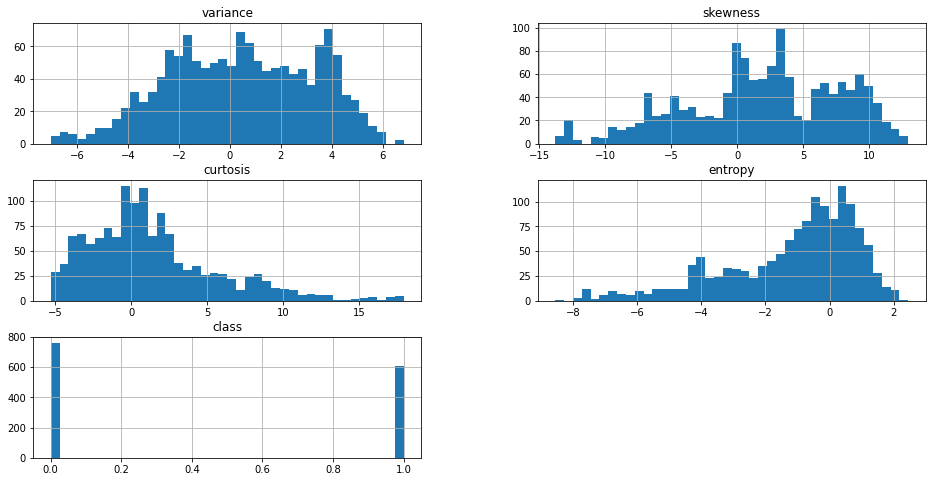

In [14]:
df.hist(figsize=(16,8),layout=(3,2),bins=40)


In [16]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

#Scale and centre the data

df_normalised = scaler.transform(X)

#Create a pandas dataframe

df_normalised = pd.DataFrame(data = X, index= X.index, columns= X.columns)


In [24]:
df_normalised.describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify=df['class'])

In [34]:
from keras.layers import Dropout

In [41]:
# Define a Callback class that stops training once accuracy reaches 99.5.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5.0% accuracy so cancelling training!")
      self.model.stop_training = True



In [49]:
callbacks = myCallback()
model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(80, activation=tf.nn.relu),
    Dropout(0.2),
	  keras.layers.Dense(40, activation=tf.nn.relu),
    Dropout(0.2),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],)
model.summary()




Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 80)                400       
_________________________________________________________________
dropout_16 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 40)                3240      
_________________________________________________________________
dropout_17 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 41        
Total params: 3,681
Trainable params: 3,681
Non-trainable params: 0
____________________________________________________

In [50]:
model.fit(X_train, y_train, epochs=50, batch_size=1,callbacks=[callbacks])
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
960/960 [==============================] - 1s 1ms/step - loss: 0.1914 - accuracy: 0.9208
Epoch 2/50
960/960 [==============================] - 1s 1ms/step - loss: 0.0246 - accuracy: 0.9927
Epoch 3/50
942/960 [============================>.] - ETA: 0s - loss: 0.0165 - accuracy: 0.9958
Reached 99.5.0% accuracy so cancelling training!
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Test accuracy: 1.0
